In [1]:
import torch

# Print PyTorch version
print("PyTorch version:", torch.__version__)

# Check for available GPUs
if torch.cuda.is_available():
    print("GPUs are available.")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("GPUs are not available.")


PyTorch version: 2.3.1+cu121
GPUs are not available.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from IPython.display import Audio

# Path to the audio file
audio_path = '/content/drive/My Drive/pytorch_vscode/RAVDESS SPEECH/Actor_01/03-01-01-01-01-01-01.wav'
# audio_path = '/content/drive/My Drive/pytorch_vscode/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav'

# Display audio player
Audio(audio_path)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [5]:
#Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav)
"""
Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
"""
# let's check the emotion in folders

'\nModality (01 = full-AV, 02 = video-only, 03 = audio-only).\n\nVocal channel (01 = speech, 02 = song).\n\nEmotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).\n\nEmotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the \'neutral\' emotion.\n\nStatement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").\n\nRepetition (01 = 1st repetition, 02 = 2nd repetition).\n\nActor (01 to 24. Odd numbered actors are male, even numbered actors are female).\n'

Extracting emotion from RAVDESS SPEECH

In [6]:
import os
folder_path = '/content/drive/My Drive/pytorch_vscode/RAVDESS SPEECH/audio_speech_actors_01-24'

emotion_speech_number = []
for speech in os.listdir(folder_path):
    speech_path = os.path.join(folder_path,speech)
    if os.path.isdir(speech_path):
        for wav in os.listdir(speech_path):
            if wav.endswith('.wav'):
                emotion_speech_number.append(wav.split('-')[2])

print(emotion_speech_number)

['01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '03', '02', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '04', '04', '03', '04', '04', '04', '04', '04', '05', '04', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '05', '04', '05', '05', '05', '05', '05', '05', '06', '05', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07

In [7]:
len(emotion_speech_number)

1440

Extracting emotion from RAVDESS SONG

In [8]:
folder_path = '/content/drive/My Drive/pytorch_vscode/RAVDESS SONG/audio_song_actors_01-24'

emotion_song_number = []
for song in os.listdir(folder_path):
    song_path = os.path.join(folder_path,song)
    if os.path.isdir(song_path):
        for wav in os.listdir(song_path):
            if wav.endswith('.wav'):
                emotion_song_number.append(wav.split('-')[2])

print(emotion_song_number)

['01', '01', '01', '01', '02', '02', '02', '02', '02', '03', '02', '02', '02', '03', '03', '03', '03', '03', '03', '04', '03', '04', '04', '04', '04', '04', '04', '05', '05', '04', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '01', '01', '01', '02', '02', '01', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05

In [9]:
len(emotion_song_number)

1012

In [10]:
ravdess_emotion_list = emotion_speech_number+emotion_song_number
print(len(ravdess_emotion_list))

2452


In [11]:
Emotions = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}


In [12]:
count_dict = {Emotions[i]: ravdess_emotion_list.count(i) for i in list(Emotions.keys())}
print(count_dict)

{'neutral': 188, 'calm': 376, 'happy': 376, 'sad': 376, 'angry': 376, 'fearful': 376, 'disgust': 192, 'surprised': 192}


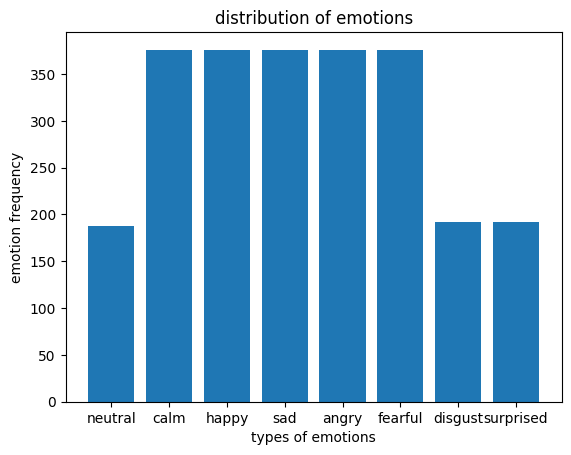

In [13]:
plt.bar(count_dict.keys(), count_dict.values())
plt.title('distribution of emotions')
plt.xlabel('types of emotions')
plt.ylabel('emotion frequency')
plt.show()

Extracting emotion from TESS

In [14]:
tess= 'OAF_Fear'
len(os.listdir(os.path.join('/content/drive/My Drive/pytorch_vscode/TESS/TESS Toronto emotional speech set data', tess)))
# len(os.listdir('TESS/TESS Toronto emotional speech set data'))

200

In [15]:
import os

# Initialize dictionaries
tess_dict_old = {}

# Path to the TESS dataset
folder_path = '/content/drive/My Drive/pytorch_vscode/TESS/TESS Toronto emotional speech set data'

# Iterate over each directory in the folder path
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Iterate over each file in the subdir
        for file in os.listdir(subdir_path):
            if file.endswith('.wav') and file.startswith('OAF'):
                # Extract the emotion from the filename
                emotion = file.split('_')[2].split('.')[0]
                if emotion in tess_dict_old:
                    tess_dict_old[emotion] += 1
                else:
                    tess_dict_old[emotion] = 1

# Print the resulting dictionary
print(tess_dict_old)

{'sad': 200, 'ps': 200, 'neutral': 199, 'angry': 200, 'fear': 200, 'happy': 200, 'disgust': 200}


In [16]:
import os

# Initialize dictionaries
tess_dict_young = {}

# Path to the TESS dataset
folder_path = '/content/drive/My Drive/pytorch_vscode/TESS/TESS Toronto emotional speech set data'

# Iterate over each directory in the folder path
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Iterate over each file in the subdir
        for file in os.listdir(subdir_path):
            if file.endswith('.wav') and file.startswith('YAF'):
                # Extract the emotion from the filename
                emotion = file.split('_')[2].split('.')[0]
                if emotion in tess_dict_young:
                    tess_dict_young[emotion] += 1
                else:
                    tess_dict_young[emotion] = 1

# Print the resulting dictionary
print(tess_dict_young)

{'neutral': 200, 'angry': 200, 'sad': 200, 'happy': 200, 'ps': 200, 'disgust': 200, 'fear': 200}


In [17]:
tess_dict ={}

for i in tess_dict_old.keys():
  for j in tess_dict_young.keys():
    if i.lower()==j.lower():
      tess_dict.update({i.lower(): tess_dict_old[i]+tess_dict_young[j]})
print(tess_dict)

{'sad': 400, 'ps': 400, 'neutral': 399, 'angry': 400, 'fear': 400, 'happy': 400, 'disgust': 400}


[]

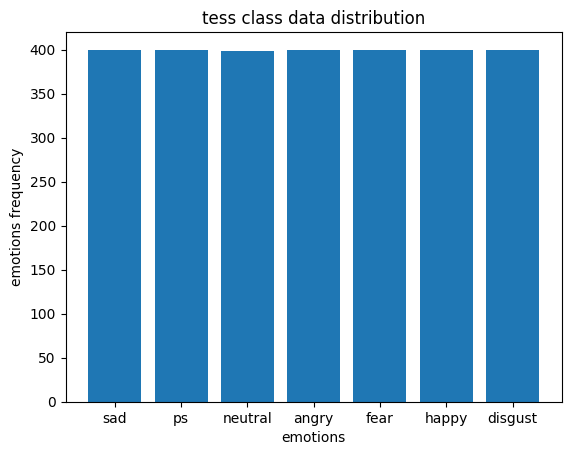

In [18]:
plt.bar(tess_dict.keys(),tess_dict.values())
plt.title('tess class data distribution')
plt.xlabel('emotions')
plt.ylabel('emotions frequency')
plt.plot()

In [19]:
count_dict.items()

dict_items([('neutral', 188), ('calm', 376), ('happy', 376), ('sad', 376), ('angry', 376), ('fearful', 376), ('disgust', 192), ('surprised', 192)])

In [20]:
tess_dict.items()

dict_items([('sad', 400), ('ps', 400), ('neutral', 399), ('angry', 400), ('fear', 400), ('happy', 400), ('disgust', 400)])

In [21]:
labels = {}
for r in count_dict.keys():
    for t in tess_dict.keys():
        if r[0]==t[0]:
            labels.update({r: count_dict[r]+tess_dict[t]})
labels.update({'calm':376})
labels['fear'] = labels.pop('fearful')

In [22]:
labels

{'neutral': 587,
 'happy': 776,
 'sad': 776,
 'angry': 776,
 'disgust': 592,
 'surprised': 592,
 'calm': 376,
 'fear': 776}

[]

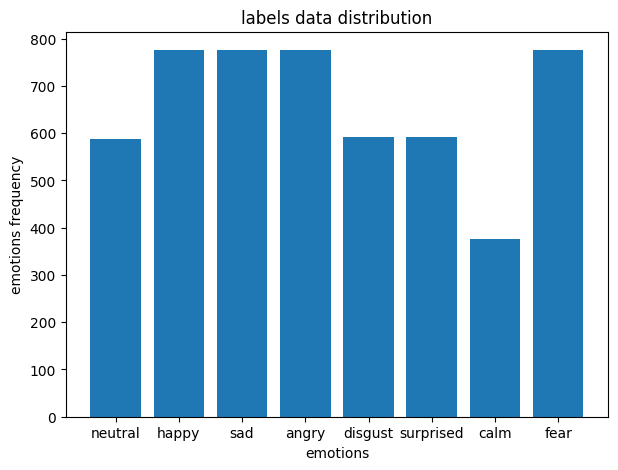

In [23]:
plt.figure(figsize=(7, 5))
plt.bar(labels.keys(), labels.values())
plt.title('labels data distribution')
plt.xlabel('emotions')
plt.ylabel('emotions frequency')
plt.plot()

In [24]:
print('total number of data points :', sum(list(labels.values())))

total number of data points : 5251


In [25]:
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
from librosa import display
import IPython.display as ipd
# !pip install noisereduce
# !pip install pydub

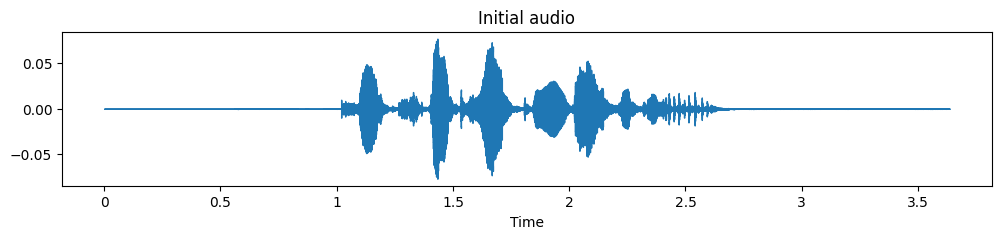

In [26]:
path = '/content/drive/My Drive/pytorch_vscode/RAVDESS SPEECH/Actor_02/03-01-01-01-01-01-02.wav'
rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,2))
librosa.display.waveshow(x, sr=sr)
plt.title('Initial audio')

rawsound

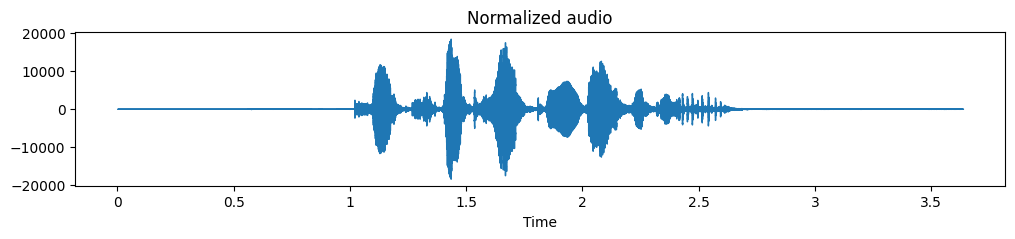

In [27]:
#Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0)
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(normal_x, sr=sr)
plt.title('Normalized audio')

normalizedsound

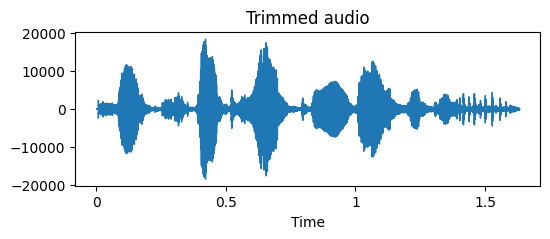

In [28]:
# Trim silence in the beginning and end.

xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(xt, sr=sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

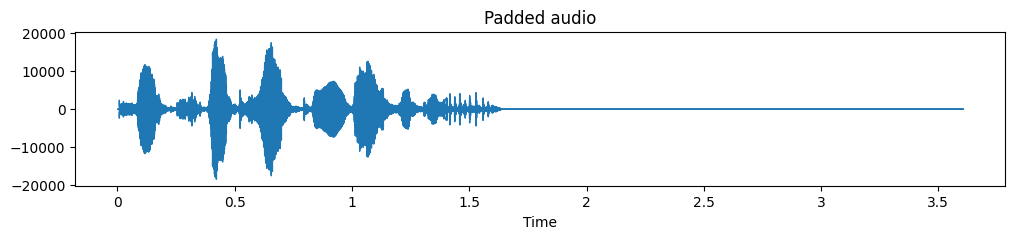

In [29]:
padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(padded_x, sr=sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

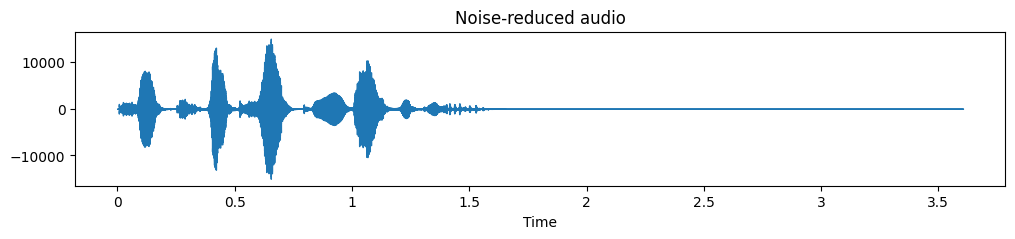

In [30]:
# Noise reduction

# Assuming 'padded_x' is your audio data and 'sr' is the sample rate
final_x = nr.reduce_noise(y=padded_x, sr=sr, stationary=True)

plt.figure(figsize=(12,2))
librosa.display.waveshow(final_x, sr=sr)
plt.title('Noise-reduced audio')

ipd.display(ipd.Audio(data = final_x, rate=sr))

In [31]:
# Feature extraction

frame_length = 2048
hop_length = 512

f1 = librosa.feature.rms(y=final_x, frame_length=frame_length, hop_length=hop_length)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length, hop_length=hop_length) # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(y=final_x, sr=sr, n_mfcc=13, hop_length=hop_length)
print('MFCCs shape:', f3.shape)

Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)


In [32]:
# Emotion kind validation function for TESS database, due to emotions written within the file names.
def find_emotion_T(name):
        if('neutral' in name): return "01"
        elif('happy' in name): return "03"
        elif('sad' in name): return "04"
        elif('angry' in name): return "05"
        elif('fear' in name): return "06"
        elif('disgust' in name): return "07"
        elif('ps' in name): return "08"
        else: return "-1"


# 'emotions' list fix for classification purposes:
#     Classification values start from 0, Thus an 'n = n-1' operation has been executed for both RAVDESS and TESS databases:
def emotionfix(e_num):
    if e_num == "01":   return 0 # neutral
    elif e_num == "02": return 1 # calm
    elif e_num == "03": return 2 # happy
    elif e_num == "04": return 3 # sad
    elif e_num == "05": return 4 # angry
    elif e_num == "06": return 5 # fear
    elif e_num == "07": return 6 # disgust
    else:               return 7 # suprised

In [33]:
import os
import glob
import librosa
import numpy as np

sample_lengths = []
base_folder_path = '/content/drive/My Drive/pytorch_vscode/Audio Files'

# Define the specific folders
folders = [
    'TESS/TESS Toronto emotional speech set data',
    'RAVDESS SPEECH',
    'RAVDESS SONG'
]

# Collect all audio files from the specified folders
audio_files = []
for folder in folders:
    folder_path = os.path.join(base_folder_path, folder)
    if os.path.exists(folder_path):
        # Using glob to find audio files
        audio_files += glob.glob(os.path.join(folder_path, '**', '*.wav'), recursive=True)
        audio_files += glob.glob(os.path.join(folder_path, '**', '*.mp3'), recursive=True)
        audio_files += glob.glob(os.path.join(folder_path, '**', '*.flac'), recursive=True)
    else:
        print(f"Folder does not exist: {folder_path}")



if audio_files:
    for file_path in audio_files:
        try:
            x, sr = librosa.load(file_path, sr=None)
            xt, index = librosa.effects.trim(x, top_db=30)
            sample_lengths.append(len(xt))
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

    if sample_lengths:
        print('Maximum sample length:', np.max(sample_lengths))
    else:
        print('No audio files processed or sample_lengths is empty.')
else:
    print("No audio files found.")


Maximum sample length: 243200


In [34]:
# Initialize data lists
rms = []
zcr = []
mfcc = []
emotions = []

# Initialize variables
total_length = 243200  # desired frame length for all of the audio samples
frame_length = 2048
hop_length = 512

folder_path = '/content/drive/My Drive/pytorch_vscode/Audio Files'

# Iterate through the files in the directory
for subdir, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(subdir, file)

            # Fetch the sample rate
            _, sr = librosa.load(file_path, sr=None)

            # Load the audio file
            rawsound = AudioSegment.from_file(file_path)

            # Normalize the audio to +5.0 dBFS
            normalizedsound = effects.normalize(rawsound, headroom=0)

            # Transform the normalized audio to np.array of samples
            normal_x = np.array(normalizedsound.get_array_of_samples(), dtype='float32')

            # Trim silence from the beginning and the end
            xt, index = librosa.effects.trim(normal_x, top_db=30)

            # Pad for duration equalization
            if len(xt) < total_length:
                padded_x = np.pad(xt, (0, total_length - len(xt)), 'constant')
            else:
                padded_x = xt[:total_length]

            # Noise reduction
            final_x = nr.reduce_noise(y=padded_x, sr=sr)

            # Feature extraction
            f1 = librosa.feature.rms(y=final_x, frame_length=frame_length, hop_length=hop_length)  # RMS
            f2 = librosa.feature.zero_crossing_rate(y=final_x, frame_length=frame_length, hop_length=hop_length, center=True)  # ZCR
            f3 = librosa.feature.mfcc(y=final_x, sr=sr, n_mfcc=13, hop_length=hop_length)  # MFCC

            # Emotion extraction from the filename
            if find_emotion_T(file) != "-1":  # TESS database validation
                name = find_emotion_T(file)
            else:  # RAVDESS database validation
                name = file[6:8]

            # Filling the data lists
            rms.append(f1)
            zcr.append(f2)
            mfcc.append(f3)
            emotions.append(emotionfix(name))

In [35]:
# Adjusting features shape to the 3D format: (batch, timesteps, feature)

f_rms = np.asarray(rms).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)

ZCR shape: (7708, 476, 1)
RMS shape: (7708, 476, 1)
MFCCs shape: (7708, 476, 13)


In [36]:
# Concatenating all features to 'X' variable.
X = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)

# Preparing 'Y' as a 2D shaped variable.
Y = np.asarray(emotions).astype('int8')
Y = np.expand_dims(Y, axis=1)

In [37]:
from json_tricks import dump, load
# !pip install json_tricks

In [38]:
# Save X,Y arrays as lists to json files.

x_data = X.tolist()
x_path = 'X_datanew.json' # FILE SAVE PATH
dump(obj = x_data, fp = x_path)

y_data = Y.tolist()
y_path = 'Y_datanew.json' # FILE SAVE PATH
dump(obj = y_data, fp = y_path)

'[[3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3]

In [39]:
# Load X,Y json files back into lists, convert to np.arrays

x_path = 'X_datanew.json' # FILE LOAD PATH
X = load(x_path)
X = np.asarray(X, dtype = 'float32')

y_path = 'Y_datanew.json' # FILE LOAD PATH
Y = load(y_path)
Y = np.asarray(Y, dtype = 'int8')

In [40]:

import torch.nn.functional as F
from sklearn.model_selection import train_test_split
# !pip install torch.nn.functional

In [41]:

# Split to train, validation, and test sets
x_train, x_tosplit, y_train, y_tosplit = train_test_split(X, Y, test_size=0.125, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_tosplit, y_tosplit, test_size=0.304, random_state=1)

# Convert numpy arrays to torch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Convert to one-hot encoding
y_train_class = F.one_hot(y_train, num_classes=8).to(torch.int8)
y_val_class = F.one_hot(y_val, num_classes=8).to(torch.int8)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train_class.shape)
print("Validation data shape:", x_val.shape)
print("Validation labels shape:", y_val_class.shape)

Training data shape: torch.Size([6744, 476, 15])
Training labels shape: torch.Size([6744, 1, 8])
Validation data shape: torch.Size([670, 476, 15])
Validation labels shape: torch.Size([670, 1, 8])


In [42]:
import json
# Convert tensors to numpy arrays
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Function to create the dictionary with the required structure
def tensor_to_dict(tensor):
    return {
        "__ndarray__": tensor.tolist(),
        "dtype": str(tensor.dtype),
        "shape": tensor.shape,
        "Corder": True  # Assuming the array is in C-order
    }

# Create dictionaries for x_test and y_test
x_test_dict = tensor_to_dict(x_test_np)
y_test_dict = tensor_to_dict(y_test_np)

# Save the dictionaries to JSON files
def save_to_json(file_path, data):
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=2)

# Specify file paths
x_test_file_path = 'x_test_data.json'
y_test_file_path = 'y_test_data.json'

# Save x_test and y_test dictionaries to JSON files
save_to_json(x_test_file_path, x_test_dict)
save_to_json(y_test_file_path, y_test_dict)

print(f"x_test saved to {x_test_file_path}")
print(f"y_test saved to {y_test_file_path}")

x_test saved to x_test_data.json
y_test saved to y_test_data.json


In [43]:
print(y_test_dict)

{'__ndarray__': [[5], [7], [5], [2], [3], [5], [1], [0], [1], [1], [5], [7], [4], [0], [2], [4], [4], [0], [5], [6], [4], [5], [2], [7], [3], [5], [2], [6], [2], [1], [3], [5], [4], [1], [6], [3], [5], [5], [4], [0], [5], [3], [2], [3], [3], [2], [3], [3], [5], [3], [7], [7], [3], [5], [2], [7], [3], [2], [0], [4], [5], [1], [5], [6], [2], [1], [4], [4], [0], [4], [1], [0], [5], [0], [4], [1], [7], [6], [5], [7], [5], [5], [5], [6], [3], [2], [3], [1], [5], [2], [2], [7], [4], [7], [3], [3], [5], [4], [0], [0], [7], [4], [5], [7], [3], [4], [4], [6], [1], [3], [1], [5], [3], [5], [7], [4], [2], [2], [4], [0], [1], [2], [3], [4], [4], [4], [5], [5], [7], [0], [2], [3], [7], [6], [4], [5], [2], [6], [0], [7], [3], [4], [2], [0], [3], [5], [2], [2], [2], [1], [1], [0], [3], [4], [6], [4], [5], [7], [7], [4], [6], [5], [5], [6], [6], [4], [0], [7], [0], [6], [7], [3], [4], [2], [7], [0], [2], [1], [7], [2], [4], [2], [1], [5], [3], [6], [7], [2], [6], [5], [4], [0], [7], [5], [3], [2], [1]

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        input_size = 15  # This should match the feature dimension of your input
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=64, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(64, 64, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(64, 8)  # Output size should match number of classes

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.fc(out[:, -1, :])  # Take the output from the last time step
        return out


model = LSTMModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training loop
num_epochs = 340
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(x_train)
    loss = criterion(outputs, y_train_class)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val)
        val_loss = criterion(val_outputs, y_val_class)
        print(f'Validation Loss: {val_loss.item():.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [ ]:
print(x_train_tensor.shape)